(500, 2)
(500,)


Using gpu device 0: GeForce GT 740M


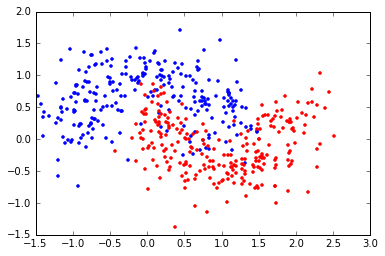

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore",category=DeprecationWarning)

from sklearn import datasets
from polyssifier import Poly
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

%matplotlib inline
data, label = make_moons(n_samples=500, noise=0.3)
print(data.shape)
print(label.shape)

plt.plot(data[label==0,0], data[label==0,1],'.');
plt.plot(data[label==1,0], data[label==1,1],'r.');

In [2]:
# single class example
pol = Poly(data,label, n_folds=10, verbose=1, exclude=[])
scores= pol.run()


INFO:polyssifier.polyssifier:Fold 1
INFO:polyssifier.polyssifier:Loading models/RBF SVM_1.p
INFO:polyssifier.polyssifier:RBF SVM_1 : 0.9411764705882353
INFO:polyssifier.polyssifier:Loading models/Random Forest_1.p
INFO:polyssifier.polyssifier:Random Forest_1 : 0.9019607843137256
INFO:polyssifier.polyssifier:Loading models/Decision Tree_1.p
INFO:polyssifier.polyssifier:Decision Tree_1 : 0.96
INFO:polyssifier.polyssifier:Loading models/Linear SVM_1.p
INFO:polyssifier.polyssifier:Linear SVM_1 : 0.8076923076923077
INFO:polyssifier.polyssifier:Loading models/Nearest Neighbors_1.p
INFO:polyssifier.polyssifier:Nearest Neighbors_1 : 0.9411764705882353
INFO:polyssifier.polyssifier:Loading models/Naive Bayes_1.p
INFO:polyssifier.polyssifier:Naive Bayes_1 : 0.830188679245283
INFO:polyssifier.polyssifier:Loading models/Logistic Regression_1.p
INFO:polyssifier.polyssifier:Logistic Regression_1 : 0.830188679245283
INFO:polyssifier.polyssifier:Running Multilayer Perceptron
INFO:polyssifier.polyssifie

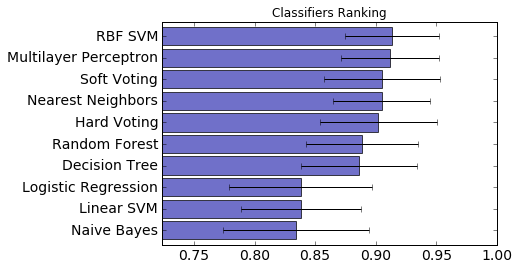

In [3]:
pol.plot()